In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("greenhouse-gas-emissions-2023.csv")
df

,Unnamed: 0,Scenario,Year,Unit,Variable,Value
0,1,Current Measures,2005,Megatonnes,Total,726.676390
1,2,Current Measures,2006,Megatonnes,Total,705.953656
2,3,Current Measures,2007,Megatonnes,Total,731.193600
3,4,Current Measures,2008,Megatonnes,Total,709.425262
4,5,Current Measures,2009,Megatonnes,Total,640.754212
...,...,...,...,...,...,...
1513,1514,Canada Net-zero,2046,Megatonnes,Direct Air Capture,-26.645478
1514,1515,Canada Net-zero,2047,Megatonnes,Direct Air Capture,-32.924584
1515,1516,Canada Net-zero,2048,Megatonnes,Direct Air Capture,-39.780406
1516,1517,Canada Net-zero,2049,Megatonnes,Direct Air Capture,-47.167888


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

,Scenario,Year,Unit,Variable,Value
0,Current Measures,2005,Megatonnes,Total,726.676390
1,Current Measures,2006,Megatonnes,Total,705.953656
2,Current Measures,2007,Megatonnes,Total,731.193600
3,Current Measures,2008,Megatonnes,Total,709.425262
4,Current Measures,2009,Megatonnes,Total,640.754212
...,...,...,...,...,...
1513,Canada Net-zero,2046,Megatonnes,Direct Air Capture,-26.645478
1514,Canada Net-zero,2047,Megatonnes,Direct Air Capture,-32.924584
1515,Canada Net-zero,2048,Megatonnes,Direct Air Capture,-39.780406
1516,Canada Net-zero,2049,Megatonnes,Direct Air Capture,-47.167888


In [5]:
df.isna().sum()

Scenario    0
Year        0
Unit        0
Variable    0
Value       0
dtype: int64

In [6]:
df = df.loc[df['Scenario'] == 'Current Measures']
df

,Scenario,Year,Unit,Variable,Value
0,Current Measures,2005,Megatonnes,Total,726.676390
1,Current Measures,2006,Megatonnes,Total,705.953656
2,Current Measures,2007,Megatonnes,Total,731.193600
3,Current Measures,2008,Megatonnes,Total,709.425262
4,Current Measures,2009,Megatonnes,Total,640.754212
...,...,...,...,...,...
501,Current Measures,2046,Megatonnes,Direct Air Capture,0.000000
502,Current Measures,2047,Megatonnes,Direct Air Capture,0.000000
503,Current Measures,2048,Megatonnes,Direct Air Capture,0.000000
504,Current Measures,2049,Megatonnes,Direct Air Capture,0.000000


In [10]:
df = df.loc[(df['Variable'] == 'Total') |
            (df['Variable'] == 'Electricity')]
df = df.reset_index(drop=True)
df

,Scenario,Year,Unit,Variable,Value
0,Current Measures,2005,Megatonnes,Total,726.676390
1,Current Measures,2006,Megatonnes,Total,705.953656
2,Current Measures,2007,Megatonnes,Total,731.193600
3,Current Measures,2008,Megatonnes,Total,709.425262
4,Current Measures,2009,Megatonnes,Total,640.754212
...,...,...,...,...,...
87,Current Measures,2046,Megatonnes,Electricity,17.795387
88,Current Measures,2047,Megatonnes,Electricity,17.937585
89,Current Measures,2048,Megatonnes,Electricity,17.877466
90,Current Measures,2049,Megatonnes,Electricity,17.941034


In [11]:
import os
df.to_csv(os.path.join("emisiones/", f"emisiones_Total&Electricity.csv"))

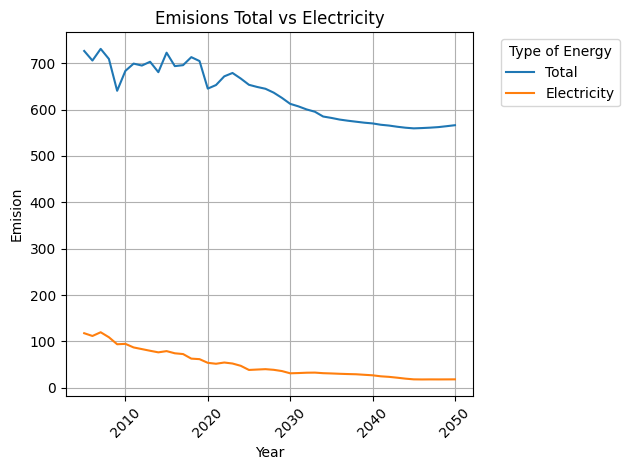

In [13]:
fig, ax = plt.subplots()
for i in df['Variable'].unique():
    type_variable = df[df['Variable'] == i]
    ax.plot(type_variable['Year'], type_variable['Value'], label=i)
    ax.plot(kind='line', figsize=(10, 6))
    
    plt.title(f'Emisions Total vs Electricity (Megatones)')
    plt.xlabel('Year')
    plt.ylabel('Emision')
    plt.xticks( rotation=45)
    plt.grid(True)
    # Show the plot
    plt.legend(title='Type of Energy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    
